In [1]:
from detr_config import Config
from detr_data_source import DataSource
from detr_factory import DETRFactory
from detr_file_manager import FileManager
from detr_metrics import MetricsAggregator, metrics_names
from detr_model_evaluator import ModelEvaluator
from detr_model_loader import ModelLoader
from detr_model_trainer import ModelTrainer
from detr_plotter import Plotter

In [2]:
Config.set_local_settings()
Config.LOGS_DIR = '../_Otros_/lightning_logs_final/'

hyperparams = ('D-DETR', 'resnet50', 256, 50, 6)
detr_factory = DETRFactory(*hyperparams)    
file_manager = FileManager(detr_factory)
data_source = DataSource(detr_factory, file_manager)
datasets, dataloaders = data_source.testing()
train_dataset, test_dataset = datasets
train_loader, test_loader = dataloaders
model_loader = ModelLoader(detr_factory, file_manager)
model_trainer = ModelTrainer(file_manager)
metrics_aggregator = MetricsAggregator(file_manager)
plotter = Plotter(file_manager, metrics_aggregator)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


 Loading Annotations:  InBreast-COCO\train\_annotations.coco.json 
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
 Loading Annotations:  InBreast-COCO\test\_annotations.coco.json 
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
model = model_loader.load_best_model()
model_evaluator = ModelEvaluator(model, detr_factory, plotter)

 Loading Model:  ../_Otros_/lightning_logs_final/InBreast-COCO\model=D-DETR_backbone=resnet50_dim=256_queries=50_layers=6\test\checkpoints\epoch=40-step=246.ckpt 


In [25]:
all_predictions = {}
threshold = 0.4
for batch_id, batch in enumerate(test_loader):
    predictions = model_evaluator.generate_predictions(batch, threshold)
    for image_id, output in predictions.items():
        all_predictions[image_id] = output

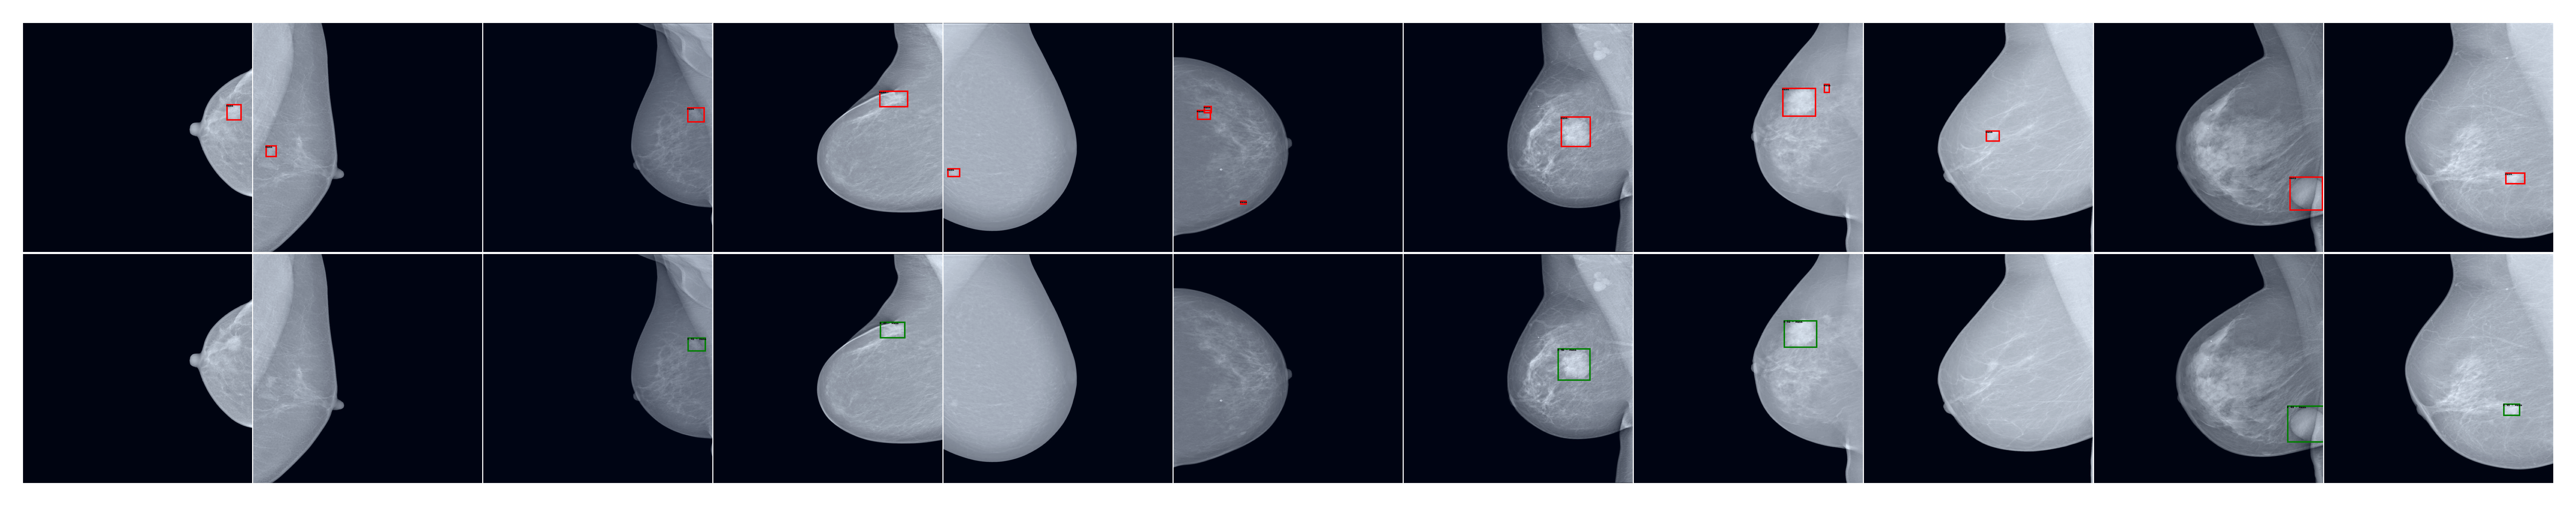

In [26]:
plotter.plot_batch_comparison(all_predictions, test_dataset, threshold, batch_id, show=True, save_fig=False)
